In [1]:
import pandas as pd
import chardet
import pandas as pd
import numpy as np
import jieba as jb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import gensim
from gensim import corpora
import pyLDAvis.gensim_models

In [2]:
comment = pd.read_csv('commentcut1.csv')

In [82]:
comment.head()

,index,weibo_id,comment_text,gender,location,like,date,label,category,target,cut
0,0,J1zF7smOR,她们不结婚不要孩子却觉得我们这种结婚有孩子的是婚驴,女,广东,14,12/05/2020 15:04,1,SCB,G,结婚 孩子 结婚 孩子 婚驴
1,1,GvXf0ymdJ,妈的什么时候有人来性侵我一下啊不要封口费的那种,男,其他,36,23/08/2018 13:10,1,SO,I,妈的 有人 性侵 封口费 那种
2,2,J2XeR8rPn,我觉得这就是对一类人所有的特点进行形容吧爹味也是贬义词为什么不觉得有性别歧视意味呢,女,浙江,0,21/05/2020 16:12,1,MA,G,这就 一类 形容 爹味 贬义词 性别 歧视 意味
3,3,IxpfTCMAo,姐姐你不要急关注久的都知道她骂的一切归根结底都是渴婚的她并不骂学艺术的她骂的是不肯像培养儿子...,女,江苏,1,31/03/2020 13:57,1,MA,I,姐姐 急关 注久 渴婚 骂学 艺术 培养 儿子 培养 女儿 女儿学 跳舞 弹琴 女儿 加码 ...
4,4,J4B0Mps5Q,给他们争取权利的不是女权是腐女你该不会说腐女都女权吧连女同性恋都不是全部女权腐女男同性恋好吗...,女,其他,0,##########,1,MA,G,权利 女权 腐女 腐女 女权 同性恋 女权 腐女 同性恋 同性恋 眼里 隐身


In [80]:
text_data = comment.cut.apply(lambda x: str(x).split()) 
dictionary = corpora.Dictionary(text_data)
dictionary.filter_extremes(no_below=5, no_above=0.9)

In [53]:
text_data.head()

0                                 [结婚, 孩子, 结婚, 孩子, 婚驴]
1                                [妈的, 有人, 性侵, 封口费, 那种]
2                    [这就, 一类, 形容, 爹味, 贬义词, 性别, 歧视, 意味]
3    [姐姐, 急关, 注久, 渴婚, 骂学, 艺术, 培养, 儿子, 培养, 女儿, 女儿学, ...
4    [权利, 女权, 腐女, 腐女, 女权, 同性恋, 女权, 腐女, 同性恋, 同性恋, 眼里...
Name: cut, dtype: object

In [54]:
from gensim.models import CoherenceModel
from gensim import corpora, models, similarities
coherence_values = []
model_list = []
for num_topics in range(2,41,2):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                    id2word=dictionary,
                    num_topics=num_topics,
                    random_state=100,
                    # update_every=1,
                    # chunksize=100,
                    # passes=10,
                    # alpha='auto',
                    # per_word_topics=True
)
    model_list.append(lda_model)
    coherencemodel = CoherenceModel(model=lda_model, texts=text_data, dictionary=dictionary, coherence='c_v')
    coherence_values.append(round(coherencemodel.get_coherence(),3))

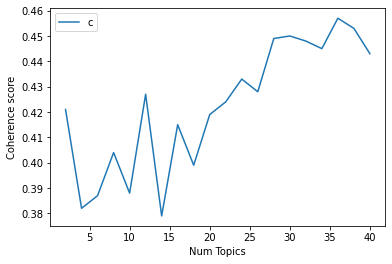

In [55]:
import matplotlib.pyplot as plt
x = range(2,41,2)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [56]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.421
Num Topics = 4  has Coherence Value of 0.382
Num Topics = 6  has Coherence Value of 0.387
Num Topics = 8  has Coherence Value of 0.404
Num Topics = 10  has Coherence Value of 0.388
Num Topics = 12  has Coherence Value of 0.427
Num Topics = 14  has Coherence Value of 0.379
Num Topics = 16  has Coherence Value of 0.415
Num Topics = 18  has Coherence Value of 0.399
Num Topics = 20  has Coherence Value of 0.419
Num Topics = 22  has Coherence Value of 0.424
Num Topics = 24  has Coherence Value of 0.433
Num Topics = 26  has Coherence Value of 0.428
Num Topics = 28  has Coherence Value of 0.449
Num Topics = 30  has Coherence Value of 0.45
Num Topics = 32  has Coherence Value of 0.448
Num Topics = 34  has Coherence Value of 0.445
Num Topics = 36  has Coherence Value of 0.457
Num Topics = 38  has Coherence Value of 0.453
Num Topics = 40  has Coherence Value of 0.443


In [92]:
ldamodel12 = gensim.models.ldamodel.LdaModel(corpus, num_topics = 12, id2word=dictionary)
 
topics = ldamodel12.print_topics(num_words=20)
for topic in topics:
    print(topic[1])
    print()

0.025*"女性" + 0.023*"男性" + 0.011*"社会" + 0.011*"事件" + 0.011*"受害者" + 0.010*"内容" + 0.010*"暴力" + 0.009*"娱乐圈" + 0.009*"艾伦" + 0.008*"法律" + 0.008*"荒木" + 0.008*"人物" + 0.007*"环境" + 0.007*"影响" + 0.007*"胁迫" + 0.006*"立场" + 0.006*"东西" + 0.006*"美国" + 0.006*"罪犯" + 0.005*"农民"

0.049*"孩子" + 0.018*"教养" + 0.017*"结婚" + 0.016*"希望" + 0.012*"德普" + 0.012*"女人" + 0.011*"男人" + 0.011*"支持" + 0.008*"私信" + 0.008*"老婆" + 0.008*"事情" + 0.007*"女权" + 0.007*"女性" + 0.006*"女方" + 0.006*"粉丝" + 0.006*"女儿" + 0.006*"没事" + 0.006*"现场" + 0.005*"关系" + 0.005*"家庭"

0.039*"女性" + 0.015*"平等" + 0.012*"男性" + 0.012*"社会" + 0.012*"男女" + 0.012*"女权" + 0.010*"运动" + 0.009*"性别" + 0.008*"权利" + 0.008*"理解" + 0.008*"自由" + 0.007*"尊重" + 0.006*"群体" + 0.005*"平权" + 0.005*"思想" + 0.005*"黑人" + 0.005*"选择" + 0.005*"女人" + 0.005*"中国" + 0.005*"希望"

0.030*"喜欢" + 0.026*"女权" + 0.016*"微博" + 0.013*"粉丝" + 0.012*"话题" + 0.009*"女性" + 0.009*"公司" + 0.008*"海王" + 0.008*"好看" + 0.007*"注册" + 0.007*"博主" + 0.007*"游戏" + 0.007*"讨厌" + 0.007*"评论" + 0.007*"发言" + 0.006*"时间" + 0.006*"公开" + 

In [93]:
lda_display = pyLDAvis.gensim_models.prepare(ldamodel12, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [46]:
graph = pyLDAvis.gensim_models.prepare(ldamodel12, corpus, dictionary, sort_topics=False)
pyLDAvis.save_json(graph, 'topic12_graph.json')

In [94]:
pyLDAvis.save_html(graph, 'topic12_graph.html')